# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# 2. Loading and Cleaning with Pandas

In [3]:
traindf = pd.read_csv("/Users/sonamchoki/Desktop/Assignment 2/Car_price_dataset/train-data.csv")
testdf = pd.read_csv("/Users/sonamchoki/Desktop/Assignment 2/Car_price_dataset/test-data.csv")

In [4]:
traindf.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [5]:
traindf.shape

(6019, 14)

In [6]:
traindf.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
traindf = traindf.drop(['New_Price'],axis = 1)
traindf.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [9]:
traindf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
traindf.dropna(subset=['Seats','Mileage'], inplace=True)

In [11]:
traindf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [13]:
traindf['Mileage']=traindf.Mileage.str.strip('km/kg?kmpl').astype('float')
traindf['Engine']=traindf.Engine.str.strip('CC').astype('int')
traindf['Power']=traindf.Power.str.strip('bhp')
traindf = traindf[traindf['Power'].str.strip()!='null']

In [14]:
traindf['Power']=traindf['Power'].astype('float')

In [15]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [16]:
for x in traindf.Power:
    print(x)

58.16
126.2
88.7
88.76
140.8
55.2
63.1
171.5
103.6
74.0
103.25
116.3
74.0
187.7
115.0
175.56
98.6
74.0
83.8
167.62
190.0
88.5
177.01
80.0
103.6
116.3
63.1
67.1
88.7
102.0
108.45
138.1
184.0
179.5
103.5
64.0
88.5
82.0
254.8
73.9
46.3
37.5
77.0
82.9
149.92
138.03
112.2
163.7
71.0
105.0
174.33
74.0
75.0
74.0
82.0
103.2
53.3
78.9
147.6
67.1
147.8
68.0
186.0
170.0
69.0
140.0
78.0
194.0
88.5
88.7
500.0
140.0
78.9
108.5
86.8
187.74
132.0
102.0
74.0
88.7
86.7
68.0
73.94
117.3
218.0
78.9
82.0
86.7
168.5
174.33
89.84
140.0
98.6
73.9
110.0
67.1
103.5
90.0
82.85
67.0
241.4
80.0
35.0
78.9
270.9
140.0
126.32
171.5
73.0
37.5
190.0
130.0
100.6
150.0
75.94
215.0
88.5
107.3
126.2
67.1
37.48
120.0
178.0
58.16
152.0
103.2
91.1
140.0
85.8
67.1
362.07
121.3
46.3
143.0
88.7
130.0
170.0
98.6
81.8
171.0
76.8
103.52
91.1
444.0
190.0
174.33
74.0
362.9
103.52
138.1
55.2
73.9
67.06
86.8
120.7
98.6
100.6
81.8
140.0
89.84
168.5
108.5
68.0
258.0
167.62
86.8
78.9
170.0
81.86
174.33
103.6
112.0
88.73
174.33
57.6
157.75

In [17]:
traindf.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60     998   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67    1582  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20    1199   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77    1248   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74

In [18]:
testdf.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [19]:
testdf.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [20]:
testdf = testdf.drop(['New_Price'],axis = 1)
testdf.drop(['Unnamed: 0'],axis=1,inplace=True)

In [21]:
testdf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [22]:
testdf.dropna(subset=['Seats'], inplace=True)

In [23]:
testdf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [24]:
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [25]:
testdf['Mileage']=testdf.Mileage.str.strip('km/kg?kmpl').astype('float')
testdf['Engine']=testdf.Engine.str.strip('CC').astype('int')
testdf['Power']=testdf.Power.str.strip('bhp')
testdf = testdf[testdf['Power'].str.strip()!='null']


In [26]:
testdf['Power']=testdf['Power'].astype('float')

In [27]:
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
dtype: object

# 3.  EDA and Visualization

In [28]:
corr = traindf.corr() 
corr

Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.169369  0.285623 -0.068045  0.014531   
Kilometers_Driven -0.169369           1.000000 -0.060608  0.093030  0.033490   
Mileage            0.285623          -0.060608  1.000000 -0.637258 -0.538844   
Engine            -0.068045           0.093030 -0.637258  1.000000  0.866301   
Power              0.014531           0.033490 -0.538844  0.866301  1.000000   
Seats              0.007833           0.083072 -0.331576  0.401116  0.101460   
Price              0.299475          -0.008249 -0.341652  0.658047  0.772843   

                      Seats     Price  
Year               0.007833  0.299475  
Kilometers_Driven  0.083072 -0.008249  
Mileage           -0.331576 -0.341652  
Engine             0.401116  0.658047  
Power              0.101460  0.772843  
Seats              1.000000  0.055547  
Price              0.055547  1.000000

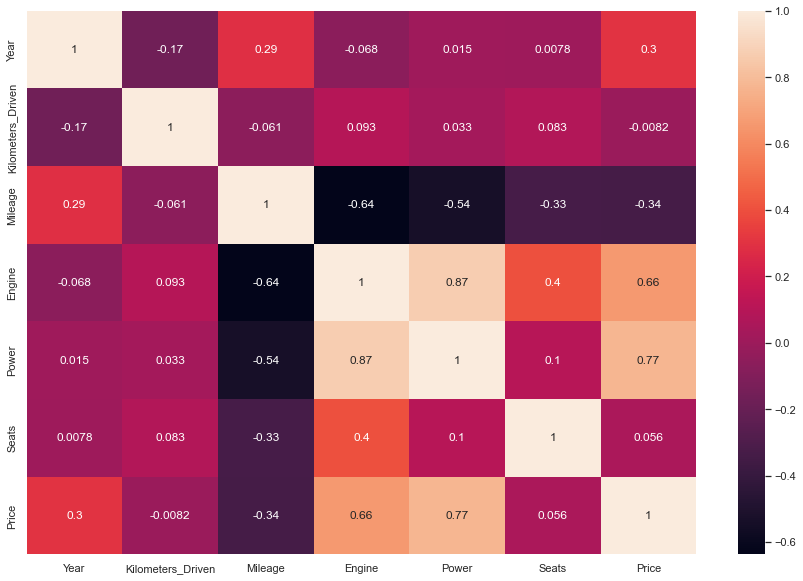

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

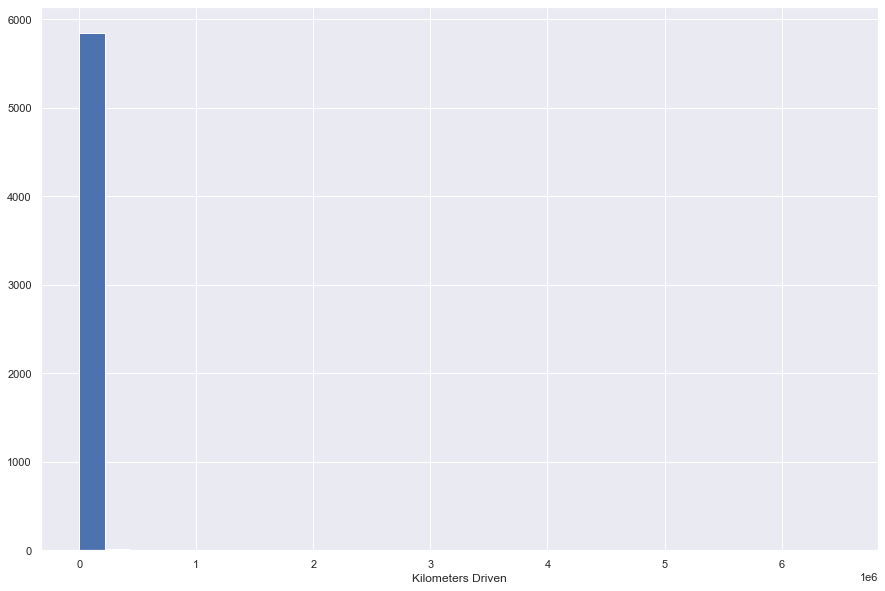

In [30]:
plt.hist(traindf.Kilometers_Driven,bins=30)
plt.xlabel('Kilometers Driven')
plt.show()

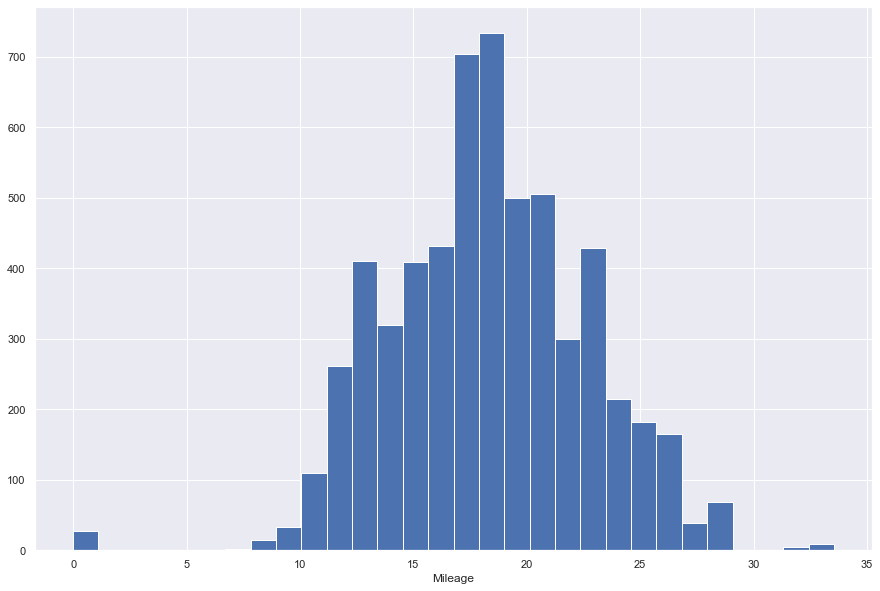

In [31]:
plt.hist(traindf.Mileage,bins=30)
plt.xlabel('Mileage')
plt.show()

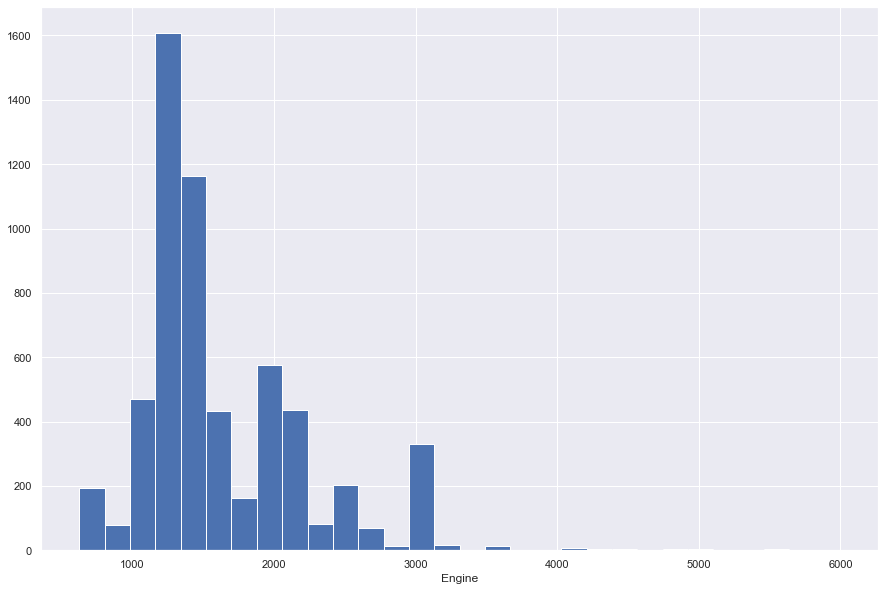

In [32]:
plt.hist(traindf.Engine,bins=30)
plt.xlabel('Engine')
plt.show()

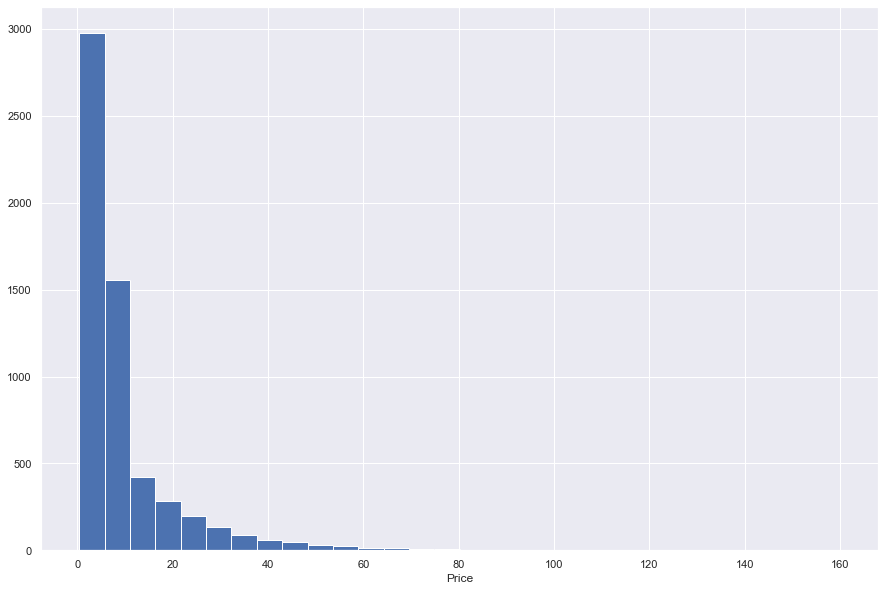

In [33]:
plt.hist(traindf.Price,bins=30)
plt.xlabel('Price')
plt.show()

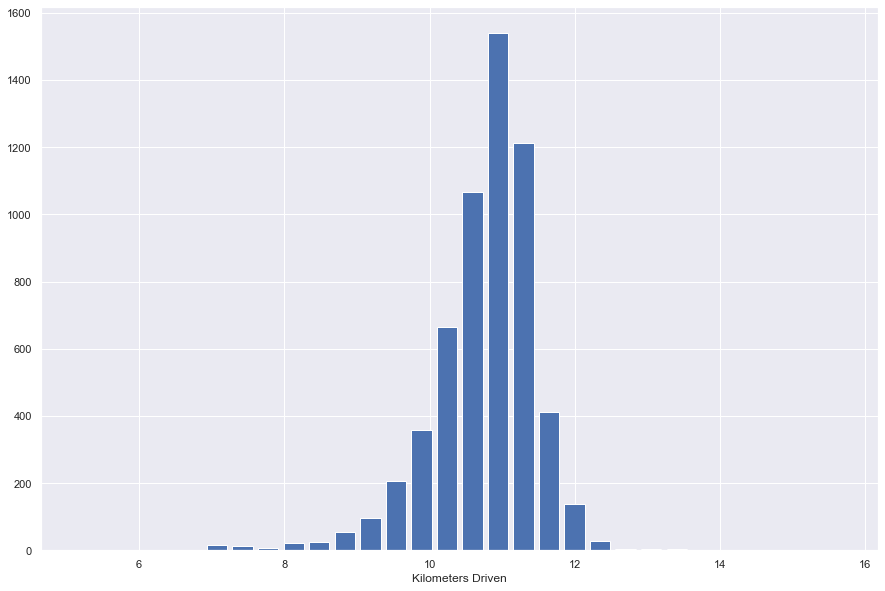

In [34]:
x = np.log(traindf.Kilometers_Driven)
plt.hist(x,bins=30,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

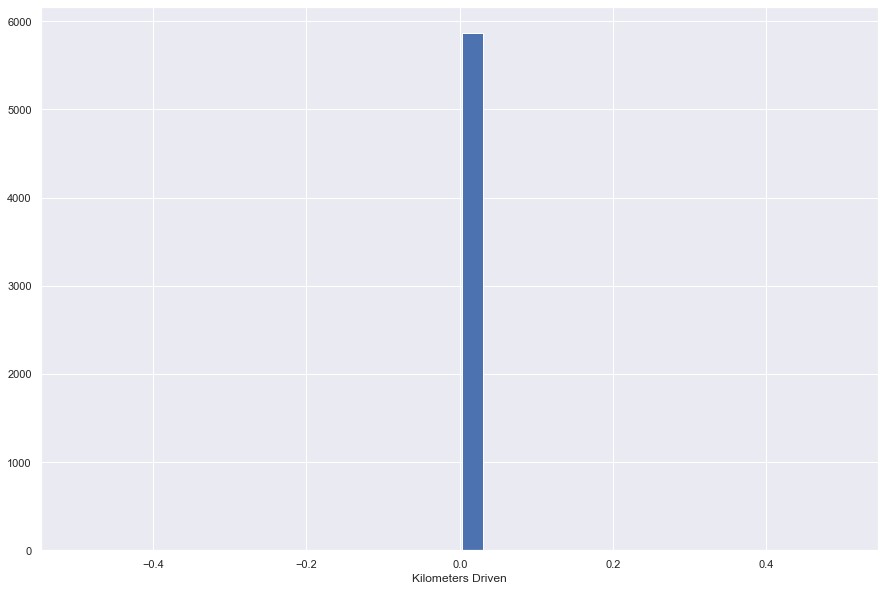

In [35]:
x = np.reciprocal(traindf.Kilometers_Driven)
plt.hist(x,bins=30,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

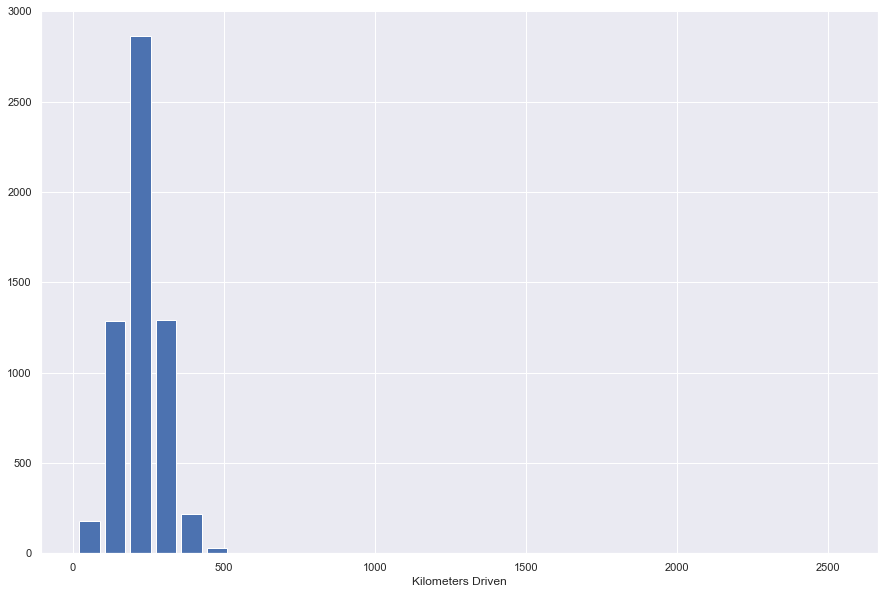

In [36]:
x = np.sqrt(traindf.Kilometers_Driven)
plt.hist(x,bins=30,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

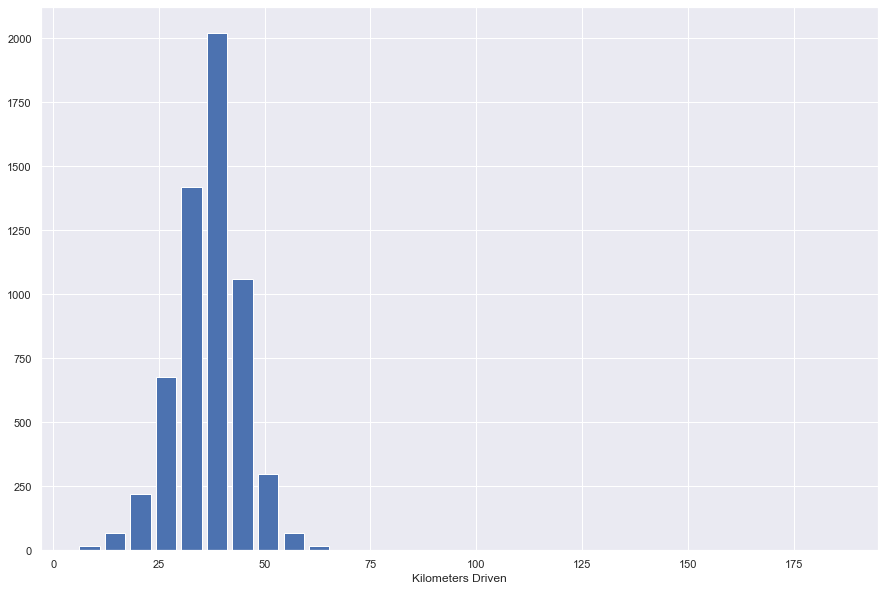

In [37]:
x = np.cbrt(traindf.Kilometers_Driven)
plt.hist(x,bins=30,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

# 4. Feature Engineering 

In [38]:
print("Train CSV \n")
print(traindf.Fuel_Type.value_counts())
print(traindf.Transmission.value_counts())
print(traindf.Owner_Type.value_counts())
print(traindf.Seats.value_counts())
print("\n")
print("Test CSV \n")
print(testdf.Fuel_Type.value_counts())
print(testdf.Transmission.value_counts())
print(testdf.Owner_Type.value_counts())
print(testdf.Seats.value_counts())

Train CSV 

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64


Test CSV 

Diesel    631
Petrol    562
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64
Manual       878
Automatic    323
Name: Transmission, dtype: int64
First             1001
Second             175
Third               23
Fourth & Above       2
Name: Owner_Type, dtype: int64
5.0     1011
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64


## Train Datasets

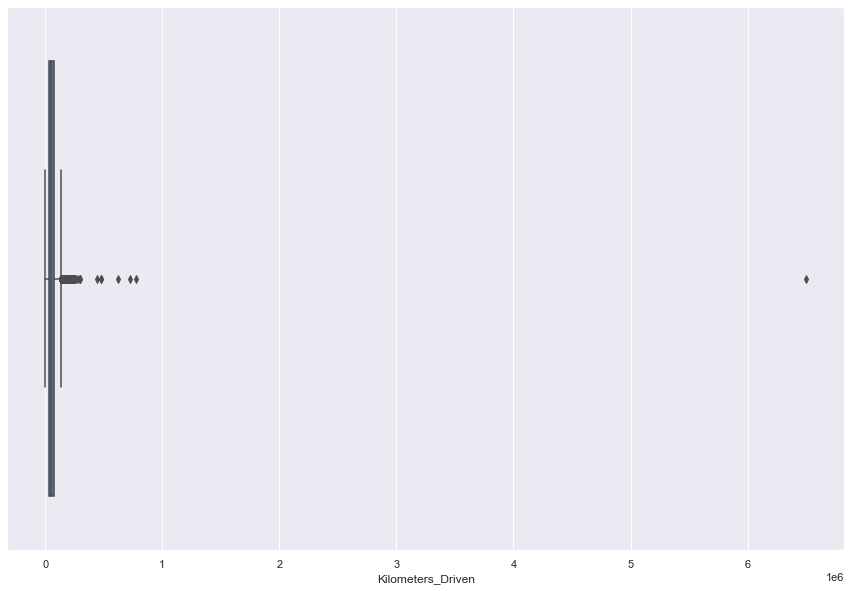

In [39]:
# ploting boxplot to check outliers
#Kilometers_Driven
sns.boxplot(x=traindf['Kilometers_Driven'])
plt.show()

In [40]:
Q1 = traindf.Kilometers_Driven.quantile(0.25)
Q3 = traindf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [41]:
traindf[(traindf.Kilometers_Driven < lowerlimit)  | (traindf.Kilometers_Driven > upperlimit)]

Name    Location  Year  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
64                        Tata Indica V2 eLS     Chennai  2016   
77                      Toyota Innova 2.0 G1     Chennai  2006   
154      Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012   
164        Ford Ecosport 1.5 DV5 MT Ambiente       Kochi  2014   
...                                      ...         ...   ...   
5852    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai  2008   
5871  Ford Endeavour 4x2 XLT Limited Edition        Pune  2009   
5914          Skoda Octavia Elegance 1.9 TDI   Hyderabad  2003   
5953                    Ford Figo Diesel EXI      Jaipur  2012   
5957                      Honda City 1.5 EXI  Coimbatore  2004   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
29               262000    Diesel       Manual  Fourth & Above     12.8   
64               178000    Diesel       Manual           First     25.0   
77               230000    Petrol       Manual           Third     12.4   
154              136997    Diesel    Automatic           First     17.2   
164              147898    Diesel       Manual           First     22.7   
...                 ...       ...          ...             ...      ...   
5852             192000    Diesel       Manual           First     12.8   
5871             180000    Diesel       Manual           First     10.9   
5914             132000    Diesel       Manual           First     18.7   
5953             140000    Diesel       Manual           First     20.0   
5957             186679    Petrol       Manual          Second     13.0   

      Engine   Power  Seats  Price  
29      2494  102.00    7.0   4.00  
64      1396   69.00    5.0   2.50  
77      1998  132.00    8.0   4.50  
154     1968  138.10    5.0   8.50  
164     1498   89.84    5.0   4.42  
...      ...     ...    ...    ...  
5852    2494  102.00    8.0   6.85  
5871    2499  143.00    7.0   7.50  
5914    1896   66.00    5.0   2.25  
5953    1399   68.00    5.0   2.51  
5957    1493  100.00    5.0   1.76  

[199 rows x 12 columns]

In [42]:
traindf = traindf[(traindf.Kilometers_Driven > lowerlimit) & (traindf.Kilometers_Driven < upperlimit)]
traindf.shape

(5673, 12)

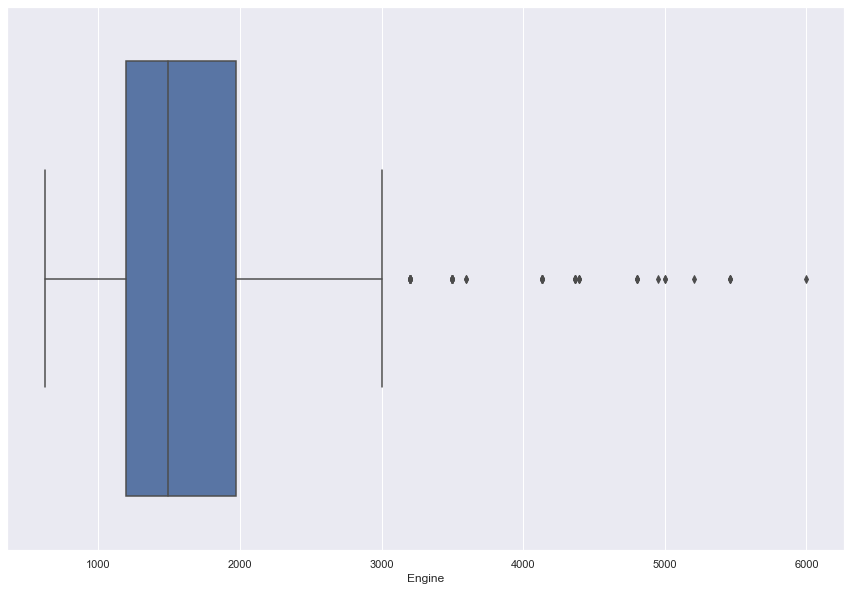

In [43]:
#Engine
sns.boxplot(x=traindf['Engine'])
plt.show()

In [44]:
EQ1 = traindf.Engine.quantile(0.25)
EQ3 = traindf.Engine.quantile(0.75)
IQR = EQ3 - EQ1
upperlimit2 = EQ3 + (IQR * 1.5)
lowerlimit2 = EQ1 - (IQR * 1.5)

In [45]:
traindf[(traindf.Engine < lowerlimit2)  | (traindf.Engine > upperlimit2)]

Name    Location  Year  \
70                    Porsche Cayenne 2009-2014 Turbo      Mumbai  2008   
152             Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010   
459                Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2016   
586                Audi Q7 4.2 TDI Quattro Technology       Kochi  2014   
589           Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore  2006   
693                   Mercedes-Benz SLK-Class SLK 350  Coimbatore  2016   
703                   Ford Endeavour 3.2 Trend AT 4X4  Coimbatore  2017   
798                   Mercedes-Benz SLK-Class SLK 350   Bangalore  2015   
806                Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
1038             Land Rover Range Rover TDV8 (Diesel)   Bangalore  2011   
1076               Ford Endeavour 3.2 Titanium AT 4X4   Hyderabad  2016   
1093               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2014   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel   Bangalore  2012   
1430                  Ford Endeavour 3.2 Trend AT 4X4       Kochi  2018   
1596                          Audi Q7 4.2 FSI quattro       Delhi  2008   
1724               Ford Endeavour 3.2 Titanium AT 4X4       Delhi  2017   
1930          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2007   
2100                          Porsche Cayenne Turbo S      Mumbai  2010   
2669                  Ford Endeavour 3.2 Trend AT 4X4  Coimbatore  2018   
2681                          Skoda Superb 3.6 V6 FSI   Hyderabad  2010   
2978                    Porsche Panamera 2010 2013 4S  Coimbatore  2010   
3028               Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
3065      Mercedes-Benz E-Class 2009-2013 E350 Petrol      Mumbai  2010   
3079               Ford Endeavour 3.2 Titanium AT 4X4      Mumbai  2016   
3115                  Ford Endeavour 3.2 Trend AT 4X4      Jaipur  2016   
3196               Ford Endeavour 3.2 Titanium AT 4X4     Chennai  2019   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8   Bangalore  2012   
3341                     BMW 7 Series 2007-2012 750Li       Kochi  2010   
3580        Mercedes-Benz CLS-Class 2006-2010 350 CDI   Hyderabad  2010   
4039           Mercedes-Benz R-Class R350 4Matic Long      Mumbai  2011   
4136      Mercedes-Benz E-Class 2009-2013 E350 Petrol      Mumbai  2009   
4227                  Ford Endeavour 3.2 Trend AT 4X4     Chennai  2016   
4342          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2006   
4388               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2015   
4451                                  Ford Mustang V8       Kochi  2018   
4559               Audi Q7 4.2 TDI Quattro Technology       Delhi  2010   
4627                          BMW 6 Series 650i Coupe       Kochi  2010   
4691                   Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
4722                    Mercedes-Benz SL-Class SL 500     Kolkata  2010   
4821                          BMW 6 Series 630i Coupe      Mumbai  2011   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore  2012   
4906               Ford Endeavour 3.2 Titanium AT 4X4   Hyderabad  2018   
4938               Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2015   
5088                  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011   
5278               Ford Endeavour 3.2 Titanium AT 4X4       Delhi  2018   
5323               Ford Endeavour 3.2 Titanium AT 4X4     Chennai  2017   
5341                         Porsche Cayenne S Diesel  Coimbatore  2016   
5414           Mercedes-Benz R-Class R350 4Matic Long       Kochi  2014   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8  Coimbatore  2013   
5441               Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
5521                  Bentley Continental Flying Spur   Hyderabad  2006   
5603                Porsche Panamera 2010 2013 Diesel       Delhi  2013   
5728      Mercedes-Benz E-Class 2009-2013 E350 Petrol     Kolkata  2009   

In [46]:
traindf = traindf[(traindf.Engine > lowerlimit2) & (traindf.Engine < upperlimit2)]
traindf.shape

(5616, 12)

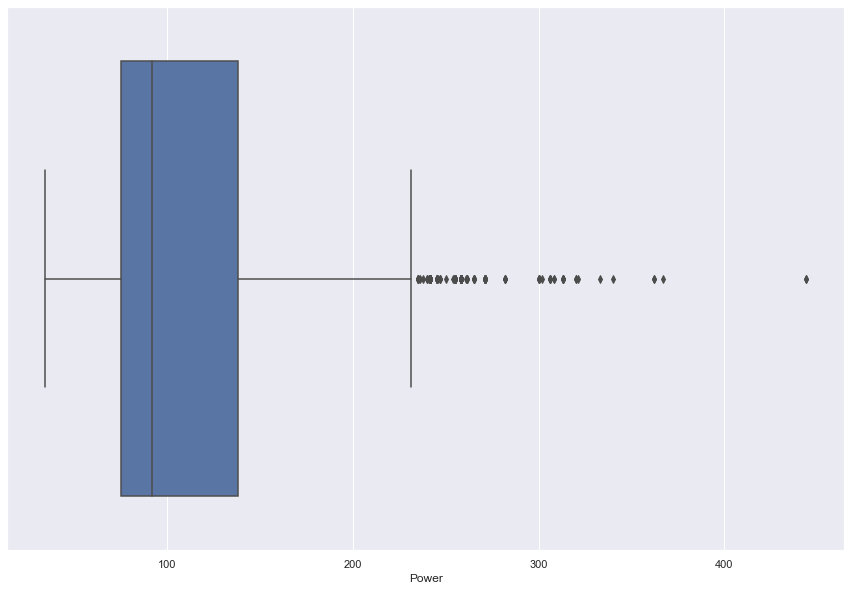

In [47]:
# Power
sns.boxplot(x=traindf['Power'])
plt.show()

In [48]:
PQ1 = traindf.Power.quantile(0.25)
PQ3 = traindf.Power.quantile(0.75)
PIQR = PQ3 - PQ1
upperlimit3 = PQ3 + (PIQR * 1.5)
lowerlimit3 = PQ1 - (PIQR * 1.5)

In [49]:
traindf[(traindf.Power < lowerlimit3)  | (traindf.Power > upperlimit3)]

Name    Location  Year  \
38                  Mercedes-Benz M-Class ML 350 CDI        Pune  2013   
103                  Audi A4 3.0 TDI Quattro Premium     Kolkata  2010   
107             Jaguar XF 3.0 Litre S Premium Luxury   Hyderabad  2011   
134                         Mercedes-Benz SLC 43 AMG     Kolkata  2017   
148                                   Audi RS5 Coupe      Mumbai  2013   
...                                              ...         ...   ...   
5803  Mercedes-Benz GL-Class 350 CDI Blue Efficiency     Chennai  2013   
5868                   BMW 3 Series 330d Convertible       Kochi  2014   
5927              Audi Q5 3.0 TDI Quattro Technology  Coimbatore  2018   
5946             BMW 5 Series 2013-2017 530d M Sport   Bangalore  2016   
6008                         Porsche Panamera Diesel   Hyderabad  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
38                85000    Diesel    Automatic      First    11.74    2987   
103               30000    Diesel    Automatic      First    14.94    2967   
107               78000    Diesel    Automatic     Second    14.74    2993   
134               13372    Petrol    Automatic      First    19.00    2996   
148               23000    Petrol    Automatic      First    11.05    2894   
...                 ...       ...          ...        ...      ...     ...   
5803             100000    Diesel    Automatic     Second    11.30    2987   
5868              51240    Diesel    Automatic      First     8.20    2993   
5927              29091    Diesel    Automatic      First    13.22    2967   
5946              16000    Diesel    Automatic      First    14.69    2993   
6008              40000    Diesel    Automatic     Second    17.85    2967   

       Power  Seats  Price  
38    254.80    5.0  28.00  
103   241.40    5.0   9.80  
107   270.90    5.0  24.00  
134   362.07    2.0  54.00  
148   444.00    4.0  37.00  
...      ...    ...    ...  
5803  254.80    7.0  38.00  
5868  245.00    4.0  29.52  
5927  241.40    5.0  45.52  
5946  258.00    5.0  48.00  
6008  300.00    4.0  45.00  

[193 rows x 12 columns]

In [50]:
traindf = traindf[(traindf.Power > lowerlimit3) & (traindf.Power < upperlimit3)]
traindf.shape

(5423, 12)

In [51]:
traindf

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0          CNG       Manual      First    26.60     998   58.16    5.0   1.75  
1       Diesel       Manual      First    19.67    1582  126.20    5.0  12.50  
2       Petrol       Manual      First    18.20    1199   88.70    5.0   4.50  
3       Diesel       Manual      First    20.77    1248   88.76    7.0   6.00  
4       Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74  
...        ...          ...        ...      ...     ...     ...    ...    ...  
6014    Diesel       Manual      First    28.40    1248   74.00    5.0   4.75  
6015    Diesel       Manual      First    24.40    1120   71.00    5.0   4.00  
6016    Diesel       Manual     Second    14.00    2498  112.00    8.0   2.90  
6017    Petrol       Manual      First    18.90     998   67.10    5.0   2.65  
6018    Diesel       Manual      First    25.44     936   57.60    5.0   2.50  

[5423 rows x 12 columns]

In [52]:
sns.boxplot(x=traindf['Power'])
plt.show()

In [53]:
#Engine
sns.boxplot(x=traindf['Engine'])
plt.show()

#Kilometers_Driven
sns.boxplot(x=traindf['Kilometers_Driven'])
plt.show()

## Test Datasets

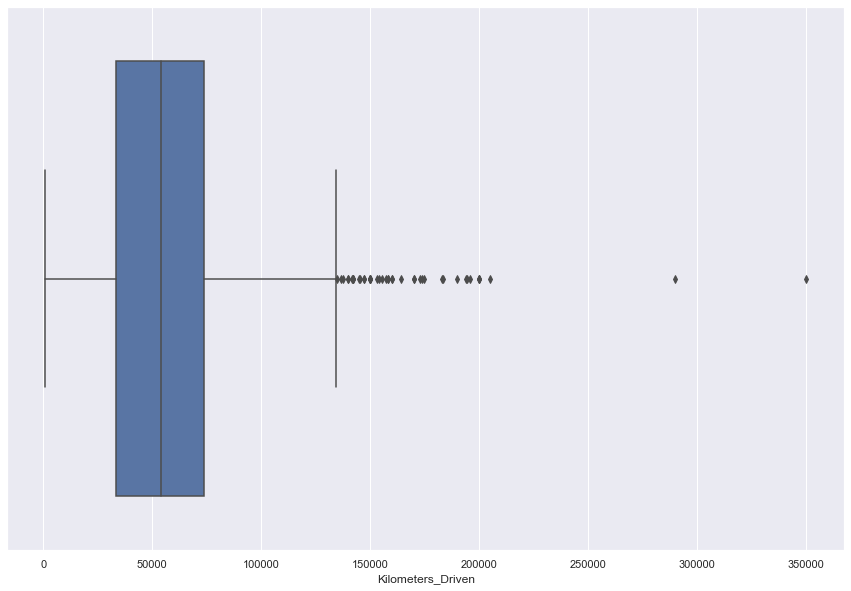

In [54]:
#Kilometers_Driven
sns.boxplot(x=testdf['Kilometers_Driven'])
plt.show()

In [55]:
Q1 = testdf.Kilometers_Driven.quantile(0.25)
Q3 = testdf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [56]:
testdf[(testdf.Kilometers_Driven < lowerlimit)  | (testdf.Kilometers_Driven > upperlimit)]

Name   Location  Year  \
17                Ford Ikon 1.4 TDCi DuraTorq    Chennai  2009   
20                            Maruti Ritz LDi       Pune  2016   
58             Tata Indigo CS LX (TDI) BS III    Chennai  2011   
87          Tata Manza Club Class Safire90 LX      Kochi  2010   
142          Volkswagen Vento Diesel Highline     Jaipur  2011   
223                Tata Sumo EX 10/7 Str BSII    Chennai  2015   
265       Toyota Innova 2.5 V Diesel 8-seater  Hyderabad  2008   
269     Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2005   
270                Mahindra Xylo E8 ABS BS IV     Jaipur  2009   
291     Toyota Innova 2.5 G (Diesel) 8 Seater     Mumbai  2007   
332     Toyota Innova 2.5 G (Diesel) 7 Seater       Pune  2015   
350                 Tata Indigo eCS eLX BS IV       Pune  2013   
353               Fiat Linea Emotion (Diesel)     Mumbai  2009   
366                Toyota Fortuner 3.0 Diesel    Chennai  2011   
383               Maruti Swift Dzire Tour LDI       Pune  2013   
389                Maruti Omni MPI CARGO BSIV       Pune  2013   
392                         Toyota Corolla H2    Chennai  2006   
421                    Maruti Swift Dzire VDI       Pune  2015   
460                    Toyota Fortuner 4x4 MT       Pune  2011   
488                       Mahindra Bolero SLX     Jaipur  2013   
538      Toyota Innova 2.5 G4 Diesel 8-seater  Hyderabad  2008   
547    Toyota Innova 2.5 VX (Diesel) 8 Seater  Hyderabad  2012   
596                     Honda CR-V 2.4 4WD AT    Chennai  2005   
612                    Toyota Fortuner 4x2 AT      Delhi  2014   
633                    Toyota Fortuner 4x2 AT  Hyderabad  2013   
687                    Maruti Swift Dzire VXi    Chennai  2012   
773    Toyota Innova 2.5 GX (Diesel) 8 Seater    Chennai  2014   
778      Toyota Innova 2.5 G4 Diesel 7-seater       Pune  2010   
855                  Tata Indica Vista TDI LS       Pune  2015   
892       Toyota Innova 2.5 V Diesel 7-seater  Bangalore  2009   
900                   ISUZU D-MAX V-Cross 4X4     Jaipur  2017   
902               Maruti Swift Dzire Tour LDI     Jaipur  2012   
924             Hyundai Sonata Embera 2.4L MT       Pune  2006   
933                 Honda Amaze VX CVT i-VTEC     Jaipur  2017   
952                   Renault Lodgy 110PS RxL    Chennai  2015   
1028            Toyota Corolla Executive (HE)  Hyderabad  2007   
1062            Maruti Swift VDi BSIII W/ ABS     Jaipur  2008   
1119            Toyota Corolla Executive (HE)    Chennai  2003   
1130                     Hyundai Elantra CRDi     Mumbai  2006   
1164                    Hyundai Verna CRDi SX  Hyderabad  2009   
1179  Land Rover Discovery 4 TDV6 Auto Diesel  Hyderabad  2012   
1181                          Maruti Ritz LDi       Pune  2015   
1194           Tata Indica Vista Quadrajet LS  Hyderabad  2013   
1208    Mahindra Renault Logan 1.5 DLE Diesel    Chennai  2007   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
17               140000    Diesel       Manual      First    13.80    1399   
20               200000    Diesel       Manual      First    23.20    1248   
58               150000    Diesel       Manual     Second    19.09    1396   
87               142299    Petrol       Manual      First    13.07    1368   
142              157301    Diesel       Manual     Second    20.54    1598   
223              196000    Diesel       Manual     Second    12.20    1948   
265              200000    Diesel       Manual     Second    12.80    2494   
269              150000    Diesel       Manual     Second    14.80    2499   
270              145278    Diesel       Manual     Second    11.68    2498   
291              194000    Diesel       Manual      First    12.99    2494   
332              205000    Diesel       Manual      First    12.99    2494   
350              155550    Diesel       Manual      First    25.00    1396   
353              200000    Diesel       Manual      Firs

In [57]:
testdf = testdf[(testdf.Kilometers_Driven > lowerlimit) & (testdf.Kilometers_Driven < upperlimit)]
testdf.shape

(1157, 11)

In [58]:
#Power
sns.boxplot(x=testdf['Power'])
plt.show()

In [59]:
PQ1 = testdf.Power.quantile(0.25)
PQ3 = testdf.Power.quantile(0.75)
PIQR = PQ3 - PQ1
upperlimit2 = PQ3 + (PIQR * 1.5)
lowerlimit2 = PQ1 - (PIQR * 1.5)

In [60]:
testdf[(testdf.Power < lowerlimit2)  | (testdf.Power > upperlimit2)]

Name    Location  Year  \
117                             BMW 5 Series 525d Sedan       Kochi  2012   
126     Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury   Bangalore  2016   
165      Mercedes-Benz GL-Class 350 CDI Blue Efficiency       Kochi  2015   
167             Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai  2008   
185                           Audi A8 L 3.0 TDI quattro       Kochi  2013   
193                    BMW 7 Series 730Ld DPE Signature     Chennai  2017   
202                                    Jaguar XF Diesel     Kolkata  2014   
260                                 Jaguar XE Portfolio  Coimbatore  2018   
289      Mercedes-Benz GL-Class 350 CDI Blue Efficiency     Chennai  2015   
293                Audi Q7 3.0 TDI Quattro Premium Plus  Coimbatore  2015   
335                             Bentley Flying Spur W12   Bangalore  2008   
369                                    BMW X6 xDrive30d  Coimbatore  2014   
415                      Land Rover Discovery 4 SDV6 SE       Kochi  2012   
471                                  BMW 7 Series 730Ld      Mumbai  2013   
496                        BMW 5 Series 530i Sport Line     Kolkata  2011   
529                                        BMW X3 2.5si   Bangalore  2009   
550                                    BMW X6 xDrive30d   Hyderabad  2011   
602      Mercedes-Benz GL-Class 350 CDI Blue Efficiency   Hyderabad  2013   
634                                Volvo S60 D5 Kinetic   Hyderabad  2011   
645                 BMW 5 Series 2013-2017 530d M Sport   Bangalore  2015   
685           Mercedes-Benz S Class 2005 2013 S 350 CDI   Hyderabad  2011   
721                              Porsche Cayenne Diesel   Bangalore  2014   
790                                        Volvo S80 D5       Delhi  2011   
805                      Jaguar XF 2.0 Petrol Portfolio     Kolkata  2017   
813                        BMW 7 Series 2007-2012 730Ld   Hyderabad  2009   
823                                      Nissan 370Z AT     Kolkata  2012   
827                             BMW 6 Series Gran Coupe       Kochi  2014   
889                Jaguar XF 3.0 Litre S Premium Luxury   Hyderabad  2011   
891                    Mercedes-Benz M-Class ML 320 CDI   Hyderabad  2008   
941                            Mercedes-Benz SLC 43 AMG  Coimbatore  2018   
945                              Mercedes-Benz GLE 350d   Hyderabad  2016   
956                     Audi A4 3.0 TDI Quattro Premium   Bangalore  2011   
975                 BMW 5 Series 2013-2017 530d M Sport       Kochi  2018   
979                   BMW 5 Series 2007-2010 525d Sedan      Mumbai  2008   
1038                            BMW 6 Series 650i Coupe       Delhi  2009   
1056                BMW 5 Series 2013-2017 530d M Sport       Kochi  2015   
1075                 Audi Q5 3.0 TDI Quattro Technology   Bangalore  2017   
1098                           Mercedes-Benz CLA 45 AMG       Kochi  2015   
1105                  Audi Q5 2008-2012 3.0 TDI Quattro   Hyderabad  2010   
1137                            BMW 7 Series 740i Sedan       Kochi  2013   
1197  BMW X5 xDrive 30d Design Pure Experience 5 Seater       Delhi  2015   
1222                            BMW 5 Series 525d Sedan       Delhi  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
117               61665    Diesel    Automatic      First    16.73    2993   
126               26900    Diesel    Automatic      First    12.00    2987   
165               69095    Diesel    Automatic      First    11.30    2987   
167               65000    Petrol    Automatic      Third    10.13    3498   
185               66848    Diesel    Automatic      First    11.80    2967   
193               16000    Diesel    Automatic      First    16.77    2993   
202               12000    Diesel    Automatic      First    14.74    2993   
260               14730    Petrol    Automatic      First    13.50    1999   
289               67000    Diesel    

In [61]:
testdf = testdf[(testdf.Power > lowerlimit2) & (testdf.Power < upperlimit2)]
testdf.shape

(1115, 11)

In [62]:
testdf

Name    Location  Year  \
0                               Maruti Alto K10 LXI CNG       Delhi  2014   
1                         Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2             Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
4                                     Hyundai i20 Magna      Mumbai  2014   
5                                Mahindra XUV500 W8 2WD  Coimbatore  2016   
...                                                 ...         ...   ...   
1229                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
1230                             Volkswagen Polo GT TSI      Mumbai  2015   
1231                             Nissan Micra Diesel XV     Kolkata  2012   
1232                             Volkswagen Polo GT TSI        Pune  2013   
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 40929       CNG       Manual      First    32.26     998   
1                 54493    Petrol       Manual     Second    24.70     796   
2                 34000    Diesel       Manual      First    13.68    2393   
4                 29000    Petrol       Manual      First    18.50    1197   
5                 85609    Diesel       Manual     Second    16.00    2179   
...                 ...       ...          ...        ...      ...     ...   
1229              89411    Diesel       Manual      First    20.54    1598   
1230              59000    Petrol    Automatic      First    17.21    1197   
1231              28000    Diesel       Manual      First    23.08    1461   
1232              52262    Petrol    Automatic      Third    17.20    1197   
1233              72443    Diesel    Automatic      First    10.00    2148   

       Power  Seats  
0      58.20    4.0  
1      47.30    5.0  
2     147.80    7.0  
4      82.85    5.0  
5     140.00    7.0  
...      ...    ...  
1229  103.60    5.0  
1230  103.60    5.0  
1231   63.10    5.0  
1232  103.60    5.0  
1233  170.00    5.0  

[1115 rows x 11 columns]

## Log Transformation for training dataset

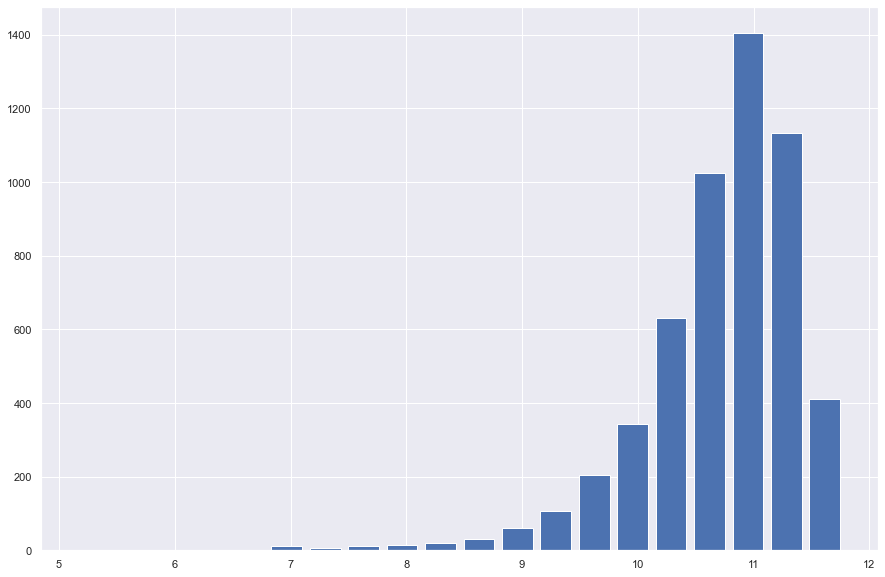

In [63]:
#Applying Log transformation to Kilometers driven
x = np.log(traindf['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

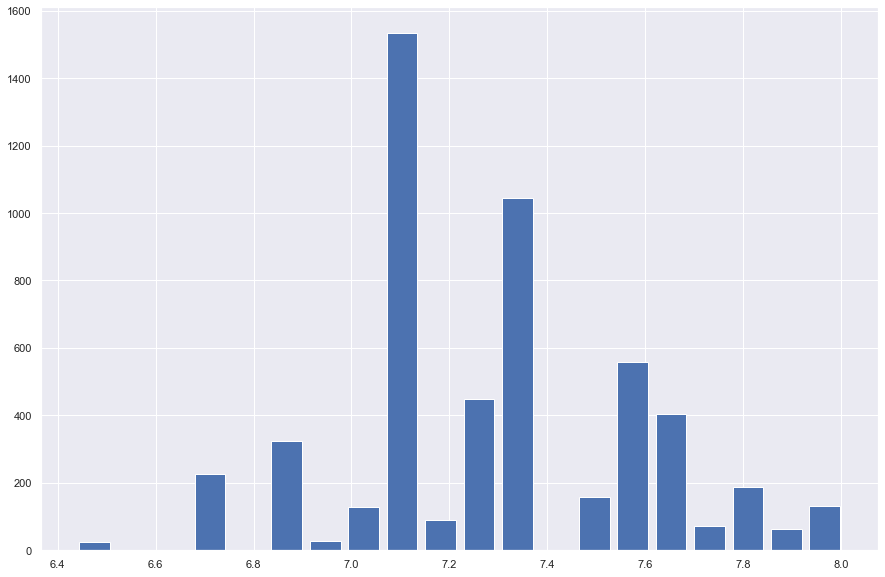

In [64]:
x = np.log(traindf['Engine'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## Log Transformation for test dataset

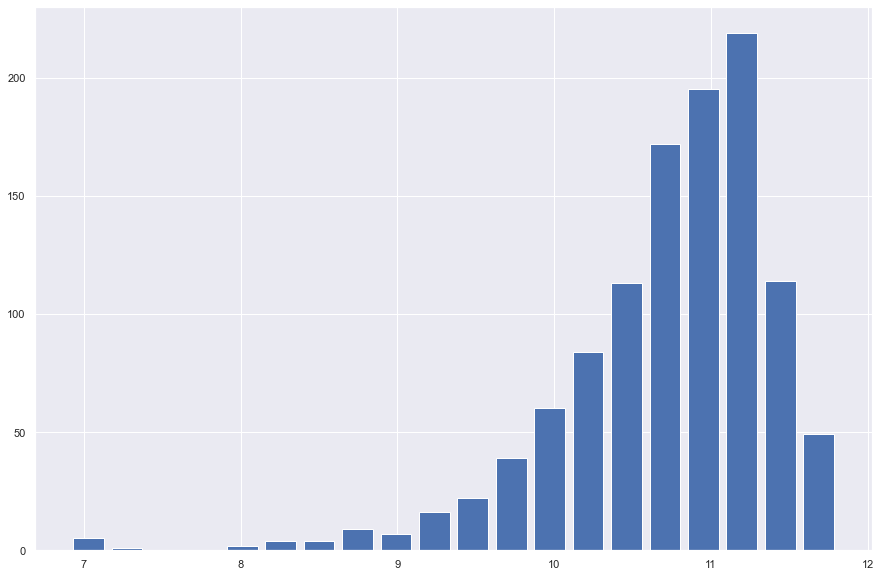

In [65]:
x = np.log(testdf['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

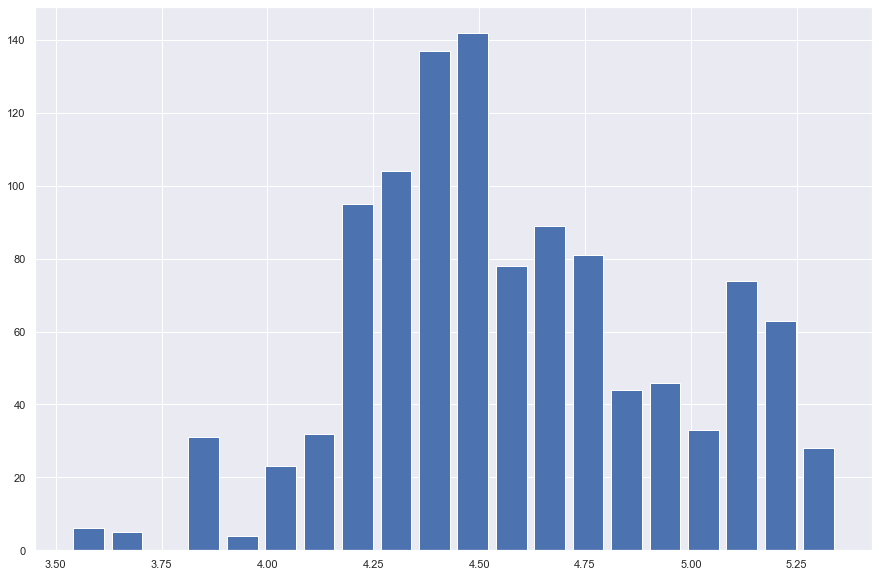

In [66]:
#Applying Log transformation to Engine
x = np.log(testdf['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## Feature Scaling for training dataset

In [67]:
traindf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [68]:
numeric_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
numericdf = traindf[numeric_columns]

In [69]:
 numericdf.isna().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [70]:
# Dataframe before scaling
numericdf.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price
0  2010              72000    26.60     998   58.16    5.0   1.75
1  2015              41000    19.67    1582  126.20    5.0  12.50
2  2011              46000    18.20    1199   88.70    5.0   4.50
3  2012              87000    20.77    1248   88.76    7.0   6.00
4  2013              40670    15.20    1968  140.80    5.0  17.74

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [72]:
 #dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

Year  Kilometers_Driven   Mileage    Engine     Power  Seats     Price
0  0.571429           0.549912  0.793083  0.157474  0.121686  0.375  0.021543
1  0.809524           0.312581  0.586464  0.403368  0.467242  0.375  0.198323
2  0.619048           0.350860  0.542636  0.242105  0.276790  0.375  0.066765
3  0.666667           0.664750  0.619261  0.262737  0.277095  0.625  0.091432
4  0.714286           0.310054  0.453190  0.565895  0.541392  0.375  0.284493

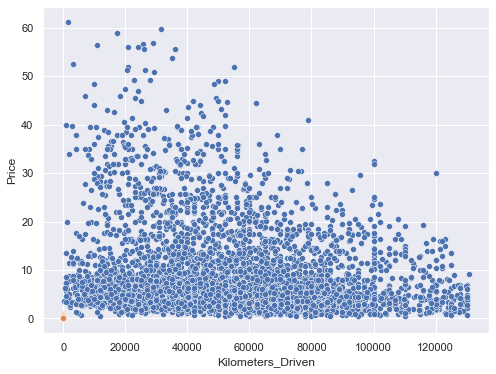

In [73]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=traindf,x='Kilometers_Driven',y='Price')
sns.scatterplot(data = transformdf,x='Kilometers_Driven',y='Price')
plt.show()

## Feature Scaling for test datasets

In [74]:
testdf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
dtype: object

In [75]:
test_numeric_columns = ['Year','Kilometers_Driven','Mileage','Power', 'Seats']
test_numericdf = testdf[test_numeric_columns]

In [76]:
# Dataframe before scaling
test_numericdf.head()

Year  Kilometers_Driven  Mileage   Power  Seats
0  2014              40929    32.26   58.20    4.0
1  2013              54493    24.70   47.30    5.0
2  2017              34000    13.68  147.80    7.0
4  2014              29000    18.50   82.85    5.0
5  2016              85609    16.00  140.00    7.0

In [77]:
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_numeric = scaler.fit_transform(test_numericdf)

In [78]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [79]:
traindf['Name'] = label_encoder.fit_transform(traindf['Name'])
traindf['Location'] = label_encoder.fit_transform(traindf['Location'])
traindf['Fuel_Type'] = label_encoder.fit_transform(traindf['Fuel_Type'])
traindf['Transmission'] = label_encoder.fit_transform(traindf['Transmission'])
traindf['Owner_Type'] = label_encoder.fit_transform(traindf['Owner_Type'])


testdf['Name'] = label_encoder.fit_transform(testdf['Name'])
testdf['Location'] = label_encoder.fit_transform(testdf['Location'])
testdf['Fuel_Type'] = label_encoder.fit_transform(testdf['Fuel_Type'])
testdf['Transmission'] = label_encoder.fit_transform(testdf['Transmission'])
testdf['Owner_Type'] = label_encoder.fit_transform(testdf['Owner_Type'])

traindf.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1047         9  2010              72000          0             1   
1   426        10  2015              41000          1             1   
2   401         2  2011              46000          3             1   
3   915         2  2012              87000          1             1   
4    20         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  Price  
0           0    26.60     998   58.16    5.0   1.75  
1           0    19.67    1582  126.20    5.0  12.50  
2           0    18.20    1199   88.70    5.0   4.50  
3           0    20.77    1248   88.76    7.0   6.00  
4           2    15.20    1968  140.80    5.0  17.74

# 5. Training Model

In [80]:
y = traindf.Price
X = traindf.drop(['Price'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [82]:
 # Creating the model using scikit learn 
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [83]:
LinearRegression()

LinearRegression()

In [84]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [85]:
 RandomForestRegressor(n_estimators=200)

RandomForestRegressor(n_estimators=200)

# 6. Prediction

In [86]:
y_pred = model.predict(X_valid)
y_pred

array([7.33326182, 0.96618448, 2.41491654, ..., 7.27059124, 5.91190447,
       4.29865723])

In [88]:
 from sklearn import metrics
from sklearn.metrics import r2_score

print('R-squared training data: ', model.score(X_train, y_train))
print('R-squared test data: ', model.score(X_valid, y_valid))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print("R2 score : %f" % r2_score(y_valid,y_pred))
print('MSE: ', metrics.mean_squared_error(y_valid, y_pred))

R-squared training data:  0.7019057820022208
R-squared test data:  0.707067131033365
Mean Absolute Error: 2.8340100397263925
Root Mean Squared Error: 4.047011048702452
R2 score : 0.707067
MSE:  16.37829842831972


In [89]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([3.86585, 1.55895, 2.63945, ..., 6.8946 , 5.5424 , 3.97175])

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.1518039272547727
Mean Squared Error: 4.603431027672755
Root Mean Squared Error: 2.145560772309364
R2 score : 0.917666


# 7. Evaluating your Model

In [91]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.7019057820022208
Test set accuracy :  0.707067131033365


In [92]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(100)

Actual Price  Predicted Price
46            4.25         7.333262
820           1.79         0.966184
1751          2.65         2.414917
1535          6.99         6.283798
2134         31.00        22.205019
...            ...              ...
1858          1.60        -2.668199
2334         22.50        20.775331
5285          4.90         4.643240
4395         17.50        17.974564
709           3.50         2.366751

[100 rows x 2 columns]

In [93]:
Y_train_predicted1 = model1.predict(X_train)
Y_test_predicted1 = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted1))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted1))

Train set accuracy:  0.9897243977069013
Test set accuracy :  0.9176656681444686


In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.1518039272547727
Mean Squared Error: 4.603431027672755
Root Mean Squared Error: 2.145560772309364
R2 score : 0.917666


In [95]:
Result1 = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted1})
Result1.head(100)

Actual Price  Predicted Price
46            4.25          3.86585
820           1.79          1.55895
1751          2.65          2.63945
1535          6.99          5.83185
2134         31.00         23.05445
...            ...              ...
1858          1.60          1.43295
2334         22.50         19.30070
5285          4.90          4.43695
4395         17.50         17.09670
709           3.50          2.95400

[100 rows x 2 columns]

# SUBMISSION DATE: 2nd April 2022